<a href="https://colab.research.google.com/github/luiseduaardo/NeuroPrev/blob/main/an%C3%A1lise.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [54]:
!git clone https://github.com/luiseduaardo/NeuroPrev.git
%cd NeuroPrev

Cloning into 'NeuroPrev'...
remote: Enumerating objects: 39, done.
remote: Counting objects: 100% (39/39), done.
remote: Compressing objects: 100% (33/33), done.
remote: Total 39 (delta 11), reused 18 (delta 4), pack-reused 0 (from 0)
Receiving objects: 100% (39/39), 631.45 KiB | 11.28 MiB/s, done.
Resolving deltas: 100% (11/11), done.
/root/NeuroPrev/NeuroPrev/NeuroPrev/NeuroPrev/NeuroPrev


In [55]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from sklearn.ensemble import RandomForestClassifier

In [56]:
df = pd.read_csv('dataset/healthcare-dataset-stroke-data.csv')

In [57]:
print("Dataset carregado com sucesso!")
df.head()

Dataset carregado com sucesso!


,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1


In [58]:
df.info()
print(df.isnull().sum())
df.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5110 entries, 0 to 5109
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 5110 non-null   int64  
 1   gender             5110 non-null   object 
 2   age                5110 non-null   float64
 3   hypertension       5110 non-null   int64  
 4   heart_disease      5110 non-null   int64  
 5   ever_married       5110 non-null   object 
 6   work_type          5110 non-null   object 
 7   Residence_type     5110 non-null   object 
 8   avg_glucose_level  5110 non-null   float64
 9   bmi                4909 non-null   float64
 10  smoking_status     5110 non-null   object 
 11  stroke             5110 non-null   int64  
dtypes: float64(3), int64(4), object(5)
memory usage: 479.2+ KB
id                     0
gender                 0
age                    0
hypertension           0
heart_disease          0
ever_married           0
work_ty

,id,age,hypertension,heart_disease,avg_glucose_level,bmi,stroke
count,5110.000000,5110.000000,5110.000000,5110.000000,5110.000000,4909.000000,5110.000000
mean,36517.829354,43.226614,0.097456,0.054012,106.147677,28.893237,0.048728
std,21161.721625,22.612647,0.296607,0.226063,45.283560,7.854067,0.215320
min,67.000000,0.080000,0.000000,0.000000,55.120000,10.300000,0.000000
25%,17741.250000,25.000000,0.000000,0.000000,77.245000,23.500000,0.000000
50%,36932.000000,45.000000,0.000000,0.000000,91.885000,28.100000,0.000000
75%,54682.000000,61.000000,0.000000,0.000000,114.090000,33.100000,0.000000
max,72940.000000,82.000000,1.000000,1.000000,271.740000,97.600000,1.000000


In [59]:
#modelo final
df_analise = df.drop('id', axis=1) #remove coluna id
df_analise['bmi'] = df_analise['bmi'].fillna(df_analise['bmi'].median()) #preenche valores vazios de bmi com mediana
df_analise = pd.get_dummies(df_analise)

In [60]:
#seprara x e y
X_analise = df_analise.drop('stroke', axis=1)
y_analise = df_analise['stroke']

In [61]:
#treina modelo padrão (sem o optuna) só p pegar a importância
modelo_analise = RandomForestClassifier(random_state=6, class_weight='balanced')
modelo_analise.fit(X_analise, y_analise)

RandomForestClassifier(class_weight='balanced', random_state=6)

In [62]:
#pega a importancia de cada coluna de dentro do modelo treinado
importancias = modelo_analise.feature_importances_
colunas = X_analise.columns

In [63]:
df_imp = pd.DataFrame({'Atributo': colunas, 'Importancia': importancias})
df_imp = df_imp.sort_values('Importancia', ascending = True) #ordenação crescente

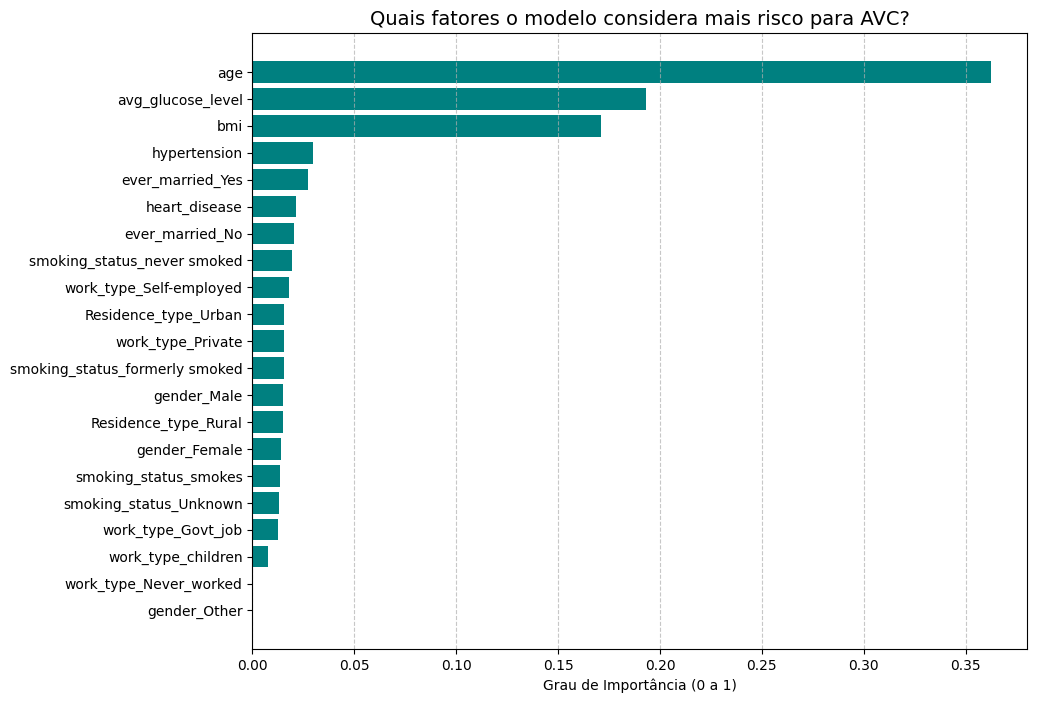

In [64]:
#print
plt.figure(figsize = (10, 8))
plt.barh(df_imp['Atributo'], df_imp['Importancia'], color = 'teal')
plt.xlabel('Grau de Importância (0 a 1)')
plt.title('Quais fatores o modelo considera mais risco para AVC?', fontsize = 14)
plt.grid(axis = 'x', linestyle = '--', alpha = 0.7)
plt.show()